In [2]:
# setup neural playground
import carabao
import carabao.screen
import carabao.cell

import importlib
importlib.reload(carabao)         # reload module
importlib.reload(carabao.screen)  # reload module
importlib.reload(carabao.cell)    # reload module

IndentationError: unexpected indent (screen.py, line 354)

mon: <carabao.screen.Monitor object at 0x117fbc490>
mon1: <carabao.screen.Monitor object at 0x1206ba9d0>
mon is mon1: False
mon == mon1: False


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

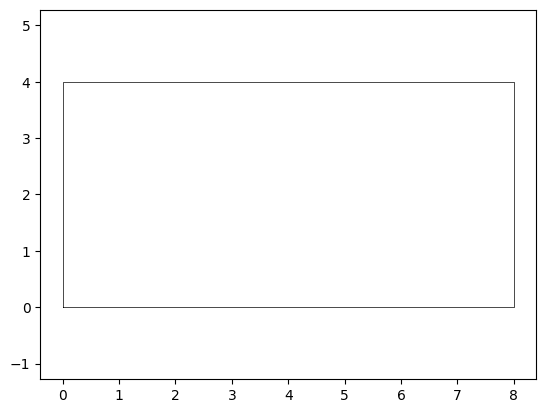

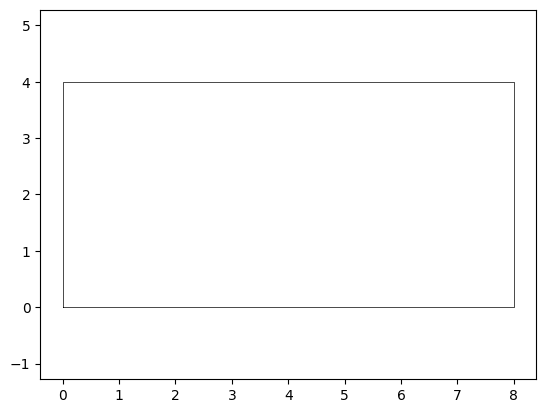

In [81]:
# minicolumn: explore a 3 x 1 minicolumn

from carabao.screen import Monitor
from carabao.cell import Cell,toy
from numpy import ones

class Mini:
    fac = 1.0
    def __init__(self,mon,k,g,K,P):
        self.mon = mon
        
        self.cells = []
        for i in range(0,3):
            cell = Cell(mon,k[i],g,K[i],P[i])
            self.cells.append(cell)

    def plot(self,j):
        for i in range(0,3):
            self.cells[i].plot(i*self.fac,j)    # plot at monitor location i,j
        self.mon.text(1,0.25,'<INIT>')
        return j+1

    def phase(self,ph,u,c,j):
        """
        c,col = mini.phase(1,u,c,j)
        c,col = mini.phase(2,u,c,j)
        c,col = mini.phase(3,u,c,j)
        """
        n = 0
        for i in range(0,len(self.cells)):
            cell = self.cells[i]
            c = cell.phase(ph,u,c)
            cell.plot(i*self.fac,j);
            n += cell.mon.hash(cell)
        cell.mon.text(j+1,0.25,mon.ascii(n))
        halfline = "==============================="
        print("%s%s" % (halfline,halfline))
        return c,j+1

    def iter(self,u,c,col):
        c,col = self.phase(1,u,c,col);  
        c,col = self.phase(2,u,c,col);  
        c,col = self.phase(3,u,c,col);  
        return c,col
        
k,g,K,P,c = toy('mini3')
mon = Monitor(m=3,n=7)
mini = Mini(mon,k,g,K,P)

print("mon:",mon)
mon1 = mon.__copy__()
print("mon1:",mon1)
print("mon is mon1:",mon is mon1)
print("mon == mon1:",mon == mon1)

u = 1; 
col = mini.plot(0)

#c,col = mini.iter(u,c,col);   # iteration 0
#c,col = mini.iter(u,c,col);   # iteration 1